In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("../data/tracks.csv")
df.head()

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,0gNNToCW3qjabgTyBSjt3H,!Que Vida! - Mono Version,['Love'],220560,11/1/66,1966,0.5250,0.600,0.540,0.00305,0.100,-11.803,0.0328,125.898,0.547,1,9,26,0
1,0tMgFpOrXZR6irEOLNWwJL,"""40""",['U2'],157840,2/28/83,1983,0.2280,0.368,0.480,0.70700,0.159,-11.605,0.0306,150.166,0.338,1,8,21,0
2,2ZywW3VyVx6rrlrX75n3JB,"""40"" - Live",['U2'],226200,8/20/83,1983,0.0998,0.272,0.684,0.01450,0.946,-9.728,0.0505,143.079,0.279,1,8,41,0
3,6DdWA7D1o5TU2kXWyCLcch,"""40"" - Remastered 2008",['U2'],157667,2/28/83,1983,0.1850,0.371,0.545,0.58200,0.183,-9.315,0.0307,150.316,0.310,1,8,37,0
4,3vMmwsAiLDCfyc1jl76lQE,"""40"" - Remastered 2008",['U2'],157667,2/28/83,1983,0.1850,0.371,0.545,0.58200,0.183,-9.315,0.0307,150.316,0.310,1,8,35,0


In [3]:
# basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169907 entries, 0 to 169906
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                169907 non-null  object 
 1   name              169907 non-null  object 
 2   artists           169907 non-null  object 
 3   duration_ms       169907 non-null  int64  
 4   release_date      169907 non-null  object 
 5   year              169907 non-null  int64  
 6   acousticness      169907 non-null  float64
 7   danceability      169907 non-null  float64
 8   energy            169907 non-null  float64
 9   instrumentalness  169907 non-null  float64
 10  liveness          169907 non-null  float64
 11  loudness          169907 non-null  float64
 12  speechiness       169907 non-null  float64
 13  tempo             169907 non-null  float64
 14  valence           169907 non-null  float64
 15  mode              169907 non-null  int64  
 16  key               16

In [4]:
# Summary stats
df.describe()

,duration_ms,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
count,1.699070e+05,169907.000000,169907.000000,169907.000000,169907.000000,169907.000000,169907.000000,169907.000000,169907.000000,169907.000000,169907.000000,169907.000000,169907.000000,169907.000000,169907.000000
mean,2.314071e+05,1977.223234,0.493217,0.538147,0.488591,0.161939,0.206692,-11.370311,0.094058,116.947850,0.532091,0.708552,5.200498,31.556681,0.084864
std,1.213223e+05,25.593318,0.376628,0.175345,0.267391,0.309330,0.176797,5.666795,0.149938,30.727079,0.262407,0.454431,3.515272,21.582730,0.278680
min,5.108000e+03,1921.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.710400e+05,1957.000000,0.094500,0.417000,0.263000,0.000000,0.098400,-14.470000,0.034900,93.516000,0.322000,0.000000,2.000000,12.000000,0.000000
50%,2.086000e+05,1978.000000,0.492000,0.548000,0.481000,0.000204,0.135000,-10.474000,0.045000,114.777000,0.544000,1.000000,5.000000,33.000000,0.000000
75%,2.629665e+05,1999.000000,0.888000,0.667000,0.710000,0.086800,0.263000,-7.118000,0.075400,135.712000,0.749000,1.000000,8.000000,48.000000,0.000000
max,5.403500e+06,2020.000000,0.996000,0.988000,1.000000,1.000000,1.000000,3.855000,0.969000,244.091000,1.000000,1.000000,11.000000,100.000000,1.000000


In [5]:
# Check for nulls
df.isnull().sum()

id                  0
name                0
artists             0
duration_ms         0
release_date        0
year                0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
mode                0
key                 0
popularity          0
explicit            0
dtype: int64

In [6]:
# Convert release date
df['release_date'] = pd.to_datetime(df['release_date'], errors = 'coerce')

# Drop duplicates
df.drop_duplicates(inplace= True)

C:\Users\user\AppData\Local\Temp\ipykernel_7304\2495621555.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['release_date'] = pd.to_datetime(df['release_date'], errors = 'coerce')


In [7]:
df['release_date'].isnull().sum()

np.int64(0)

In [8]:
df['release_date'].head(10)

0   2066-11-01
1   1983-02-28
2   1983-08-20
3   1983-02-28
4   1983-02-28
5   2012-01-01
6   1966-01-01
7   2061-01-01
8   1946-01-01
9   2052-01-01
Name: release_date, dtype: datetime64[ns]

# 1. Distribution of song popularity

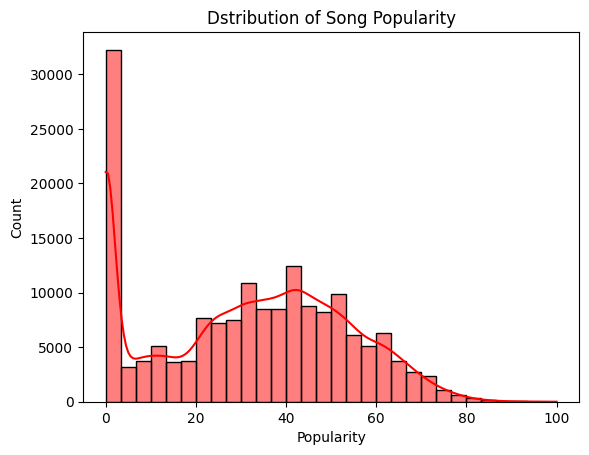

In [9]:
sns.histplot(df['popularity'], bins = 30, kde = True, color = 'red')
plt.title('Dstribution of Song Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

# 2. Correlation Heatmap

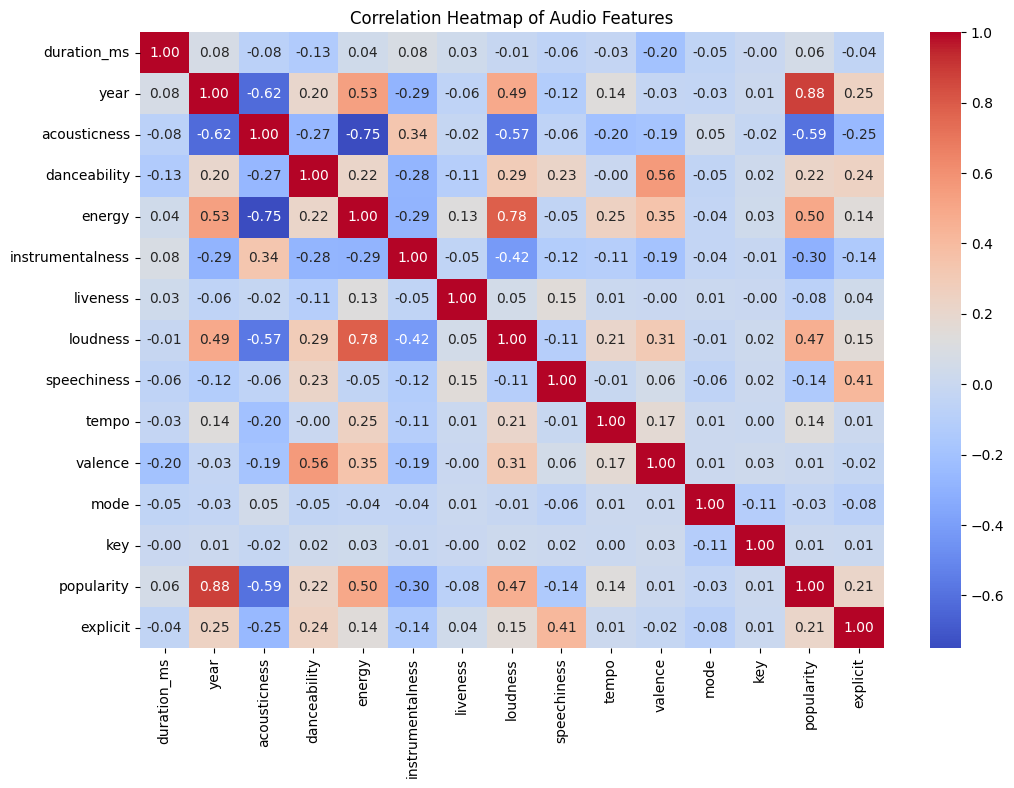

In [11]:
# to see relationships between features like energy, danceability, tempo, etc.

# selecting only numeric audio features
features = df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
corr = features.corr()

# Heatmap
plt.figure(figsize = (12,8))
sns.heatmap(corr, annot = True, fmt = '.2f', cmap = 'coolwarm')
plt.title("Correlation Heatmap of Audio Features")
plt.show()

# 3. Energy Vs Danceability Scatter Plot

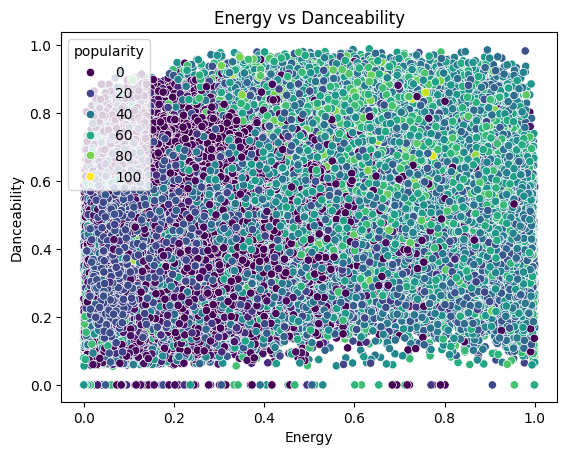

In [13]:
sns.scatterplot(data=df, x='energy', y='danceability', hue='popularity', palette = 'viridis')
plt.title('Energy vs Danceability')
plt.xlabel('Energy')
plt.ylabel('Danceability')
plt.show()

# 4. Top Artists in the Dataset

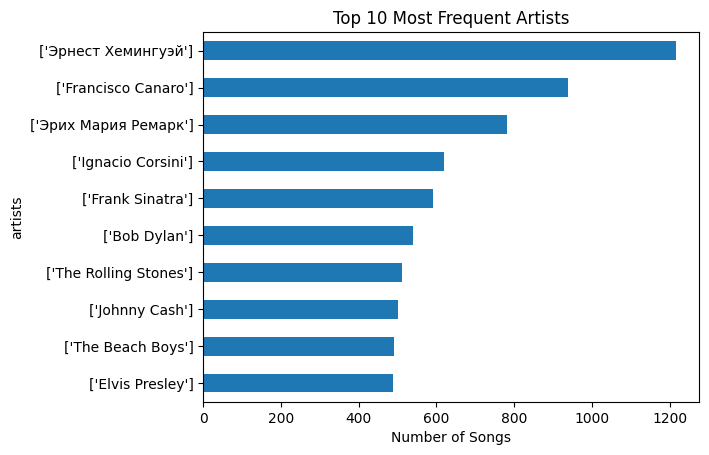

In [14]:
df['artists'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Most Frequent Artists')
plt.xlabel('Number of Songs')
plt.gca().invert_yaxis()
plt.show()

# 5. Tempo(BPM) Vs Valence(Moodiness)

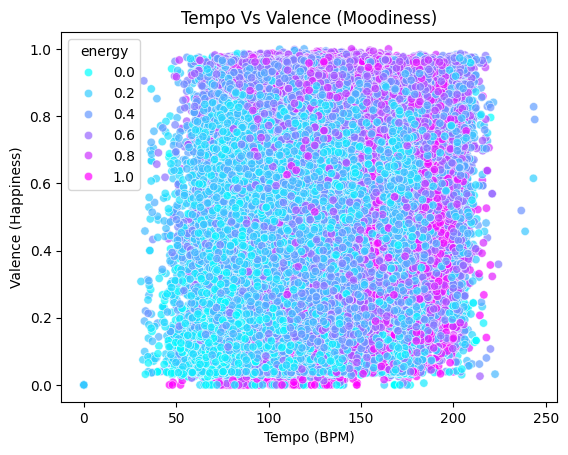

In [16]:
# Valence: how happy or positive a track sounds
sns.scatterplot(data=df, x='tempo', y='valence', hue='energy', palette='cool', alpha = 0.7)
plt.title('Tempo Vs Valence (Moodiness)')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Valence (Happiness)')
plt.show()

# 6. Popularity Over Time

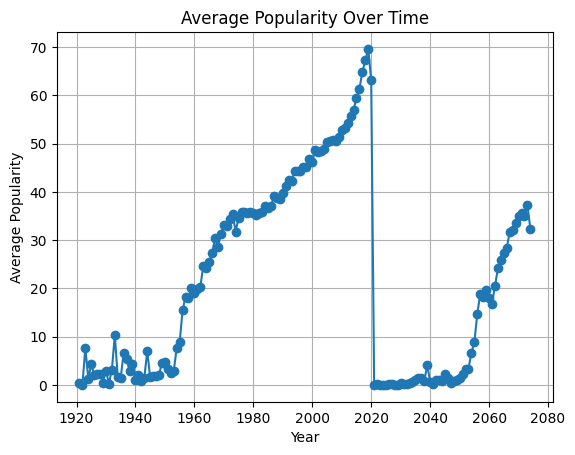

In [17]:
# Extract year from release_date
df['year'] = df['release_date'].dt.year

# Group and plot
df.groupby('year')['popularity'].mean().plot(kind='line',marker='o')
plt.title('Average Popularity Over Time')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.grid(True)
plt.show()

# 7. Liveness Vs Acousticness Bubble Plot

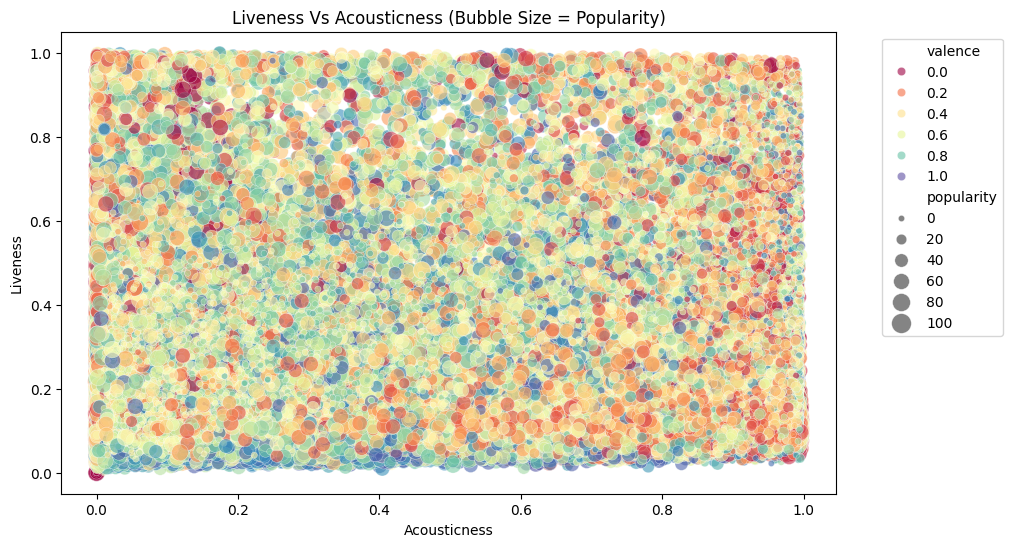

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='acousticness', y='liveness', size='popularity', sizes=(20,200), alpha=0.6, hue='valence', palette='Spectral')
plt.title('Liveness Vs Acousticness (Bubble Size = Popularity)')
plt.xlabel('Acousticness')
plt.ylabel('Liveness')
plt.legend(bbox_to_anchor = (1.05, 1), loc=2)
plt.show()

# Mood Distribution

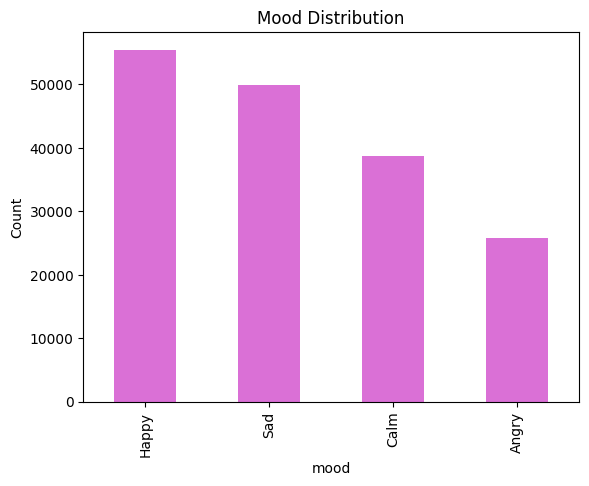

In [20]:
# This gives us our target column (mood) for classification.

def get_mood(row):
    if row['valence'] >= 0.5 and row['energy'] >= 0.5:
        return 'Happy'
    elif row['valence'] >= 0.5 and row['energy'] < 0.5:
        return 'Calm'
    elif row['valence'] < 0.5 and row['energy'] < 0.5:
        return 'Sad'
    else:
        return 'Angry'

df['mood'] = df.apply(get_mood, axis=1)
df['mood'].value_counts().plot(kind='bar', color='orchid')
plt.title('Mood Distribution')
plt.ylabel('Count')
plt.show()

# Preparing the Data for Modeling

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Features
X = df[['valence', 'energy', 'danceability', 'tempo', 'acousticness', 'speechiness']]

# Target
le = LabelEncoder()
y = le.fit_transform(df['mood'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Training a Classifier 

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

model =RandomForestClassifier(n_estimators = 100, random_state = 42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names = le.classes_))

Accuracy: 1.0
              precision    recall  f1-score   support

       Angry       1.00      1.00      1.00      5175
        Calm       1.00      1.00      1.00      7669
       Happy       1.00      1.00      1.00     11036
         Sad       1.00      1.00      1.00     10102

    accuracy                           1.00     33982
   macro avg       1.00      1.00      1.00     33982
weighted avg       1.00      1.00      1.00     33982



# Saving the Model

In [25]:
import joblib

joblib.dump(model, 'D:/ADITI/Aditi projects/ML Projects/spotify-mood-classifier/mood_classifier.pkl')
joblib.dump(le, 'D:/ADITI/Aditi projects/ML Projects/spotify-mood-classifier/label_encoder.pkl')

['D:/ADITI/Aditi projects/ML Projects/spotify-mood-classifier/label_encoder.pkl']